<a href="https://colab.research.google.com/github/francianerod/Doutorado-ESAN-UFMS/blob/main/C%C3%93DIGO_TESE_PARTE_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Código feito por:** Franciane Rodrigues

**Parte 1:** Caracterização da produtividade da sojicultura em Mato Grosso do Sul e a relação com a Temperatura da Superficie do Mar (TSM)

**Técnica**: Análise Exploratória de Dados e Teste de Hipótese

**Periodo:** 1995-2021 

**Fonte de dados:** PAM-IBGE e CPC/NOAA

In [ ]:
# Comando de abertura para Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **INSTALAÇÃO E ABERTURA DE BIBLIOTECAS** 

In [ ]:
"""
!pip install pandas-profiling
!pip install --upgrade pandas-profiling
!pip install pingouin
"""

'\n!pip install pandas-profiling\n!pip install --upgrade pandas-profiling\n!pip install pingouin\n'

In [ ]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from scipy import stats
import pingouin as pg
from datetime import datetime
from pandas_profiling import ProfileReport

### **BASE DE DADOS**

In [ ]:
dateparse = lambda dates: datetime.strptime(dates, '%Y')

In [ ]:
# Base de dados 
df1 = pd.read_excel('/content/drive/MyDrive/Tese/Dados TESE - PARTE 1.xlsx', 
                    sheet_name= 'Serie3',  
                    parse_dates = ['Ano'],
                    index_col = 'Ano', 
                    date_parser = dateparse)

In [ ]:
df1.head()

,Área colhida (ha),Quantidade produzida (ton),Rendimento médio (kg/ha),Valor de produção (mil reais),TSM,Classificação
Ano,,,,,,
1995-01-01,1043689,2283546,2187,289785,0.8,El Niño
1996-01-01,831654,2003904,2409,405233,-0.9,La Niña
1997-01-01,885526,2184283,2466,532012,-0.4,Neutralidade
1998-01-01,1108974,2319167,2091,471282,2.1,El Niño
1999-01-01,1073760,2799117,2606,677170,-1.4,La Niña


In [ ]:
# Informações sobre as variáveis ou atributos 
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27 entries, 1995-01-01 to 2021-01-01
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Área colhida (ha)              27 non-null     int64  
 1   Quantidade produzida (ton)     27 non-null     int64  
 2   Rendimento médio (kg/ha)       27 non-null     int64  
 3   Valor de produção (mil reais)  27 non-null     int64  
 4   TSM                            27 non-null     float64
 5   Classificação                  27 non-null     object 
dtypes: float64(1), int64(4), object(1)
memory usage: 1.5+ KB


### **RELATÓRIO DE ANÁLISE DE DADOS EXPLORATÓRIA**

In [ ]:
# executa a função que gera o relatório
#relatorio = ProfileReport(df1, title='Sojicultura')
#relatorio.to_file(output_file="relatorio_parte1.html")

In [ ]:
df1.describe()

,Área colhida (ha),Quantidade produzida (ton),Rendimento médio (kg/ha),Valor de produção (mil reais),TSM
count,2.700000e+01,2.700000e+01,27.000000,2.700000e+01,27.000000
mean,1.833420e+06,5.253030e+06,2742.814815,4.731131e+06,-0.066667
std,6.990593e+05,2.842938e+06,504.572861,6.236245e+06,1.013752
min,8.316540e+05,2.003904e+06,1827.000000,2.897850e+05,-1.400000
25%,1.152259e+06,3.191057e+06,2388.000000,1.093522e+06,-0.850000
50%,1.738091e+06,4.570771e+06,2820.000000,2.629070e+06,-0.300000
75%,2.254320e+06,6.822497e+06,3040.000000,6.326819e+06,0.600000
max,3.375260e+06,1.222665e+07,3638.000000,3.002486e+07,2.300000


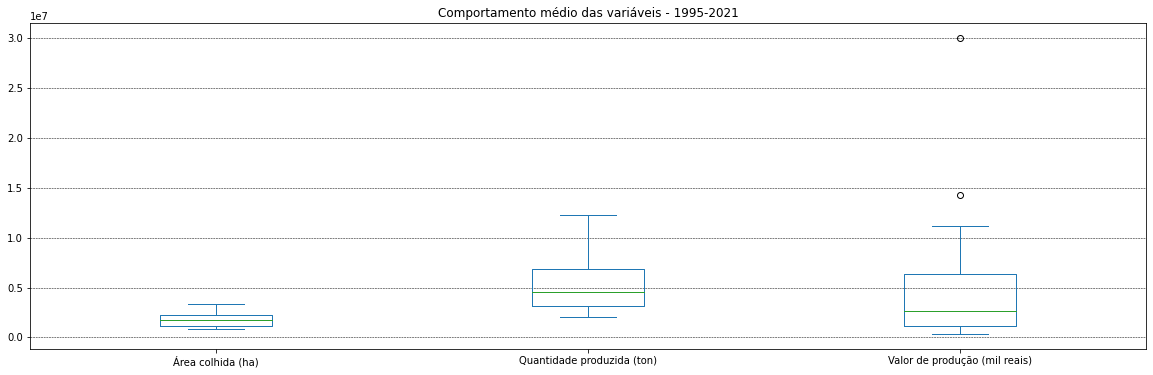

In [ ]:
# Visualização boxplot
df1[['Área colhida (ha)','Quantidade produzida (ton)','Valor de produção (mil reais)']].plot.box(figsize=(20,6)) 
plt.title('Comportamento médio das variáveis - 1995-2021')             
plt.grid(color='black', linestyle='--', linewidth=0.5, axis='y')
plt.rcParams.update({'font.size': 16})
plt.show()

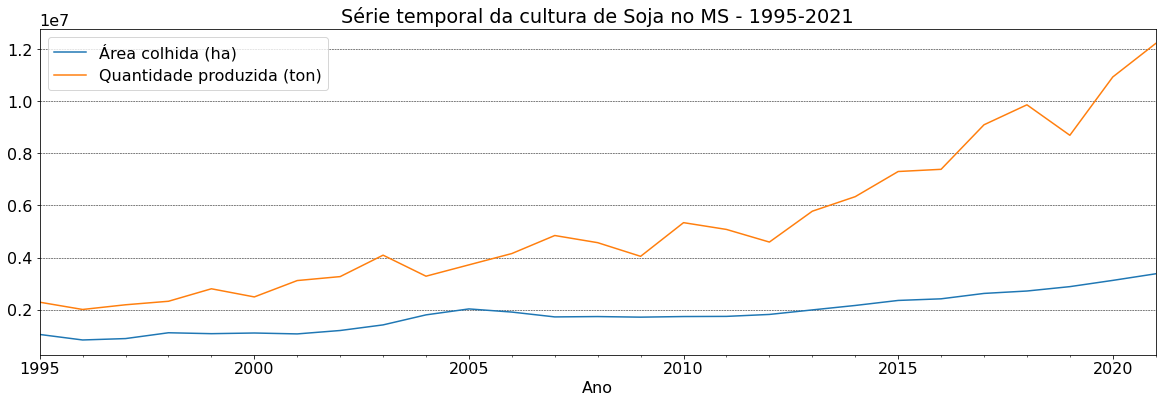

In [ ]:
# Visualização por gráfico de linha
df1[['Área colhida (ha)', 'Quantidade produzida (ton)']].plot.line(figsize=(20,6))
plt.rcParams.update({'font.size': 16})
plt.title('Série temporal da cultura de Soja no MS - 1995-2021') 
plt.grid(color='black', linestyle='--', linewidth=0.5, axis='y')
plt.show()

### **ANÁLISE EXPLORATÓRIA GRÁFICA**

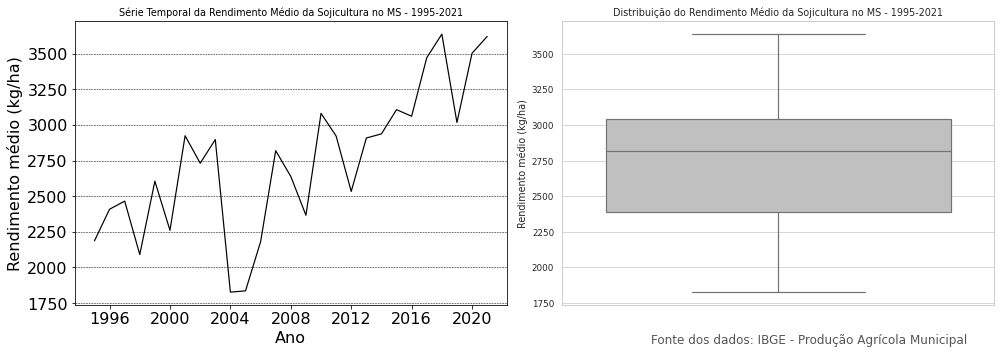

In [ ]:
# Gráfico de linha do rendimento médio
# Tamanho
plt.figure(figsize = ((14, 5)))

# Gráfico 1
plt.subplot(1, 2, 1)
sns.set_theme(style="whitegrid")
sns.set_context('paper')
sns.lineplot(x = 'Ano', 
             y='Rendimento médio (kg/ha)', 
             data = df1, 
             color = "black")
plt.grid(color='black', linestyle='--', linewidth=0.5, axis='y')
plt.title('Série Temporal da Rendimento Médio da Sojicultura no MS - 1995-2021') 

# Gráfico 2
plt.subplot(1, 2, 2)
sns.boxplot(y="Rendimento médio (kg/ha)", data=df1, color='silver')
plt.title('Distribuição do Rendimento Médio da Sojicultura no MS - 1995-2021') 

# Ajustes
plt.tight_layout() 
plt.annotate('Fonte dos dados: IBGE - Produção Agrícola Municipal', 
             xy=(0.65, 0.06), 
             xycoords='figure fraction',
             horizontalalignment='left', 
             verticalalignment='top', fontsize=12, color='#555555')

plt.rcParams.update({'font.size': 14})
plt.show()

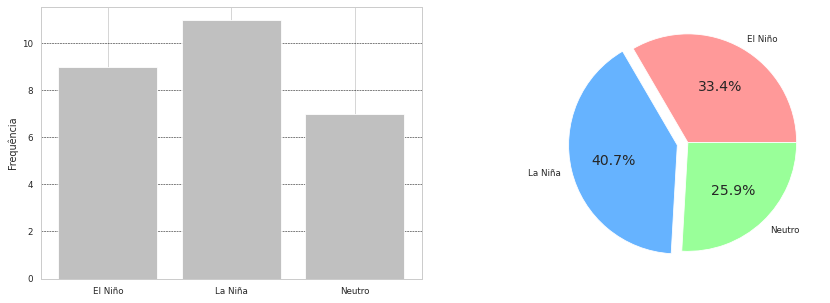

In [ ]:
# Gráfico dos eventos climáticos globais ocorridos durante o ciclo da soja 1995-2020

plt.figure(figsize = ((15, 5)))

# Gráfico 1
plt.subplot(1, 2, 1)
tsm = ['El Niño', 'La Niña', 'Neutro']
frequencia = [9 , 11,  7,] 
plt.bar(tsm, frequencia, color='silver')
plt.ylabel('Frequência')
#plt.title('Eventos Climáticos Globais ocorridos entre setembro a março de 1995-2020')
plt.grid(color='black', linestyle='--', linewidth=0.5, axis='y')

# Gráfico 2
plt.subplot(1, 2, 2)
tsm2 = ['El Niño', 'La Niña', 'Neutro']
freq_relativa = [33.4, 40.7,  25.9] 
explode = (0, 0.1, 0)
colors = ['#ff9999','#66b3ff','#99ff99']
plt.pie(freq_relativa, 
        labels = tsm2, 
        autopct='%1.1f%%', 
        explode=explode, 
        colors=colors)

plt.rcParams.update({'font.size': 12})
plt.show()

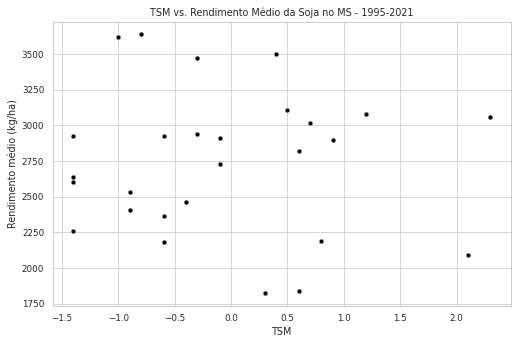

In [ ]:
# Analise bivariada 

plt.figure(figsize = ((14, 5)))

plt.subplot(1, 2, 1)
sns.set_theme(style="whitegrid")
sns.set_context('paper')
sns.scatterplot(data = df1, x = 'TSM', y = 'Rendimento médio (kg/ha)', color = "black")
plt.rcParams.update({'font.size': 14})
plt.title('TSM vs. Rendimento Médio da Soja no MS - 1995-2021')

# Ajustes Gráficos

plt.tight_layout() 
plt.show()

**Matrizes de Correlação** 

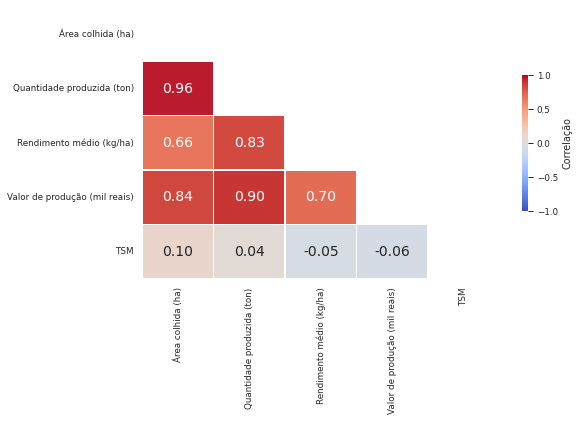

In [ ]:
correlation = df1.corr(method='pearson')
mascara = np.triu(np.ones_like(correlation, dtype=bool))
plt.figure(figsize = ((8, 5)))
plot = sns.heatmap(correlation, 
                   mask=mascara,
                   annot = True, 
                   fmt=".2f", vmax=1, center=0, vmin=-1, 
                   cbar=True, cmap='coolwarm', 
                   linewidths=.5, 
                   cbar_kws={"shrink": .5, 'label': 'Correlação', 'orientation': 'vertical'})

plt.show()

### **TESTE DE HIPÓTESE DA CORRELAÇÃO**

In [ ]:
# Teste de Significância da correlação de Pearson com a biblioteca Scipy
stats.pearsonr(df1['TSM'], df1['Rendimento médio (kg/ha)']   

(-0.05281731547555683, 0.7935968347510315)

In [ ]:
# Teste de Significância da correlação de Pearson com a biblioteca Pigouin
df1.iloc[:].pairwise_corr(method='pearson')

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,Área colhida (ha),Quantidade produzida (ton),pearson,two-sided,27,0.956649,"[0.91, 0.98]",6.649131e-15,5.903e+11,1.000000
1,Área colhida (ha),Rendimento médio (kg/ha),pearson,two-sided,27,0.658416,"[0.37, 0.83]",1.887780e-04,176.854,0.975435
2,Área colhida (ha),Valor de produção (mil reais),pearson,two-sided,27,0.841203,"[0.68, 0.93]",3.904839e-08,3.738e+05,0.999981
3,Área colhida (ha),TSM,pearson,two-sided,27,0.100492,"[-0.29, 0.46]",6.179698e-01,0.269,0.078744
4,Quantidade produzida (ton),Rendimento médio (kg/ha),pearson,two-sided,27,0.834975,"[0.67, 0.92]",6.094744e-08,2.492e+05,0.999970
5,Quantidade produzida (ton),Valor de produção (mil reais),pearson,two-sided,27,0.895609,"[0.78, 0.95]",2.803994e-10,3.39e+07,1.000000
6,Quantidade produzida (ton),TSM,pearson,two-sided,27,0.044177,"[-0.34, 0.42]",8.268108e-01,0.244,0.054995
7,Rendimento médio (kg/ha),Valor de produção (mil reais),pearson,two-sided,27,0.702656,"[0.44, 0.85]",4.379946e-05,650.841,0.991246
8,Rendimento médio (kg/ha),TSM,pearson,two-sided,27,-0.052817,"[-0.42, 0.33]",7.935968e-01,0.247,0.057399
9,Valor de produção (mil reais),TSM,pearson,two-sided,27,-0.060569,"[-0.43, 0.33]",7.640935e-01,0.249,0.059930
